#                             Credit EDA Assignment 

## First Step:- Understanding the Business Problem.......

##### Aim is to  identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing datasets 
apdata = pd.read_csv("application_data.csv")
apdata.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
previous_data = pd.read_csv("previous_application.csv")
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

#### Checking basic Meta data

In [4]:
# Shape of Application dataset
apdata.shape

(307511, 122)

In [5]:
# shape of Previous data
previous_data.shape

(1048575, 37)

In [6]:
apdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# checking dtypes of features given in datasets 
apdata.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [8]:
# Checking null values deeply
apdata.info(verbose= True , null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

### OBSETVATION :- There are lots of colmns with null values but datatypes seems correct
#### Checking stats of dataset

In [9]:
apdata.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

## Checking Missing Values in each Column

In [10]:
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows

In [11]:
apdata.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                           0
HOUR_APPR_PROCESS_START              0
REG_REGION_NOT_WORK_REGION           0
LIVE_REGION_NOT_WORK_REGION          0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
ORGANIZATION_TYPE                    0
FLAG_DOCUMENT_21                     0
FLAG_DOCUMENT_20                     0
FLAG_DOCUMENT_19                     0
FLAG_DOCUMENT_18                     0
FLAG_DOCUMENT_17                     0
FLAG_DOCUMENT_16                     0
FLAG_DOCUMENT_15                     0
FLAG_DOCUMENT_14                     0
FLAG_DOCUMENT_13                     0
FLAG_DOCUMENT_12                     0
FLAG_DOCUMENT_11                     0
FLAG_DOCUMENT_10                     0
FLAG_DOCUMENT_9                      0
FLAG_DOCUMENT_8                      0
FLAG_DOCUMENT_7                      0
FLAG_DOCUMENT_6                      0
FLAG_DOCUMENT_5                      0
FLAG_DOCUMENT_4          

In [96]:
### Getting percentage of missing values 
(apdata.isnull().sum()/len(apdata)*100).sort_values(ascending=False)

FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0

 ### Handling Missing Values

### Observation
 
 - Some columns had missing values 
 - we are going to remove missing values whoesever having high percentage of missing value
 - Considering Threshold value as 50 

In [13]:
apdata = apdata.loc[:,(apdata.isnull().sum()/len(apdata)*100)<50] 

In [14]:
apdata.shape

(307511, 81)

### Observation
41 Colmns has missing values percentage>50%
Once they removed we are now having 81 colmns to work

In [15]:
# Checking updated percentage of missing values
(apdata.isnull().sum()/len(apdata)*100).sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

### Fetching out columns having null values between 0% - 49%

In [16]:
nulvalue = apdata.columns[((apdata.isnull().sum()/len(apdata)*100)<=40) & ((apdata.isnull().sum()/len(apdata)*100)>0)]
print(nulvalue)
print(len(nulvalue))

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')
18


### Handling Outliers and Null Values 

#### Observation:-
- AMT_Annuity is numeric variable 
- missing values in percentage is 0.003902
- using .describe boxplot for checking outliers

In [17]:
# Inspecting AMT_Anuity column
apdata[apdata['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

## Checking outliers using Statistical Summary

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
10%       11074.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
99%       70006.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


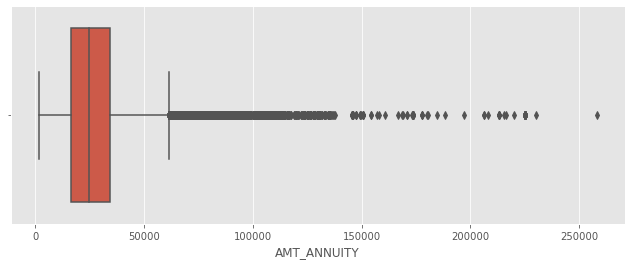

In [18]:
print(apdata['AMT_ANNUITY'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99]))
plt.style.use("ggplot")
plt.figure(figsize=[11,4])
sns.boxplot(apdata['AMT_ANNUITY'])
plt.show()

## AMT_Goods_price imputation

### Observation:-
- AMT_goods price  is numeric variable
- missing values in percentage is 0.090403
- using .describe boxplot for checking outliers

In [19]:
# Inspecting AMT_GOODS_PRICE column
apdata[apdata['AMT_GOODS_PRICE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
7880        109190       1    Revolving loans           F            N   
7995        109322       0    Revolving loans           M            N   
10819       112595       0    Revolving loans           F            N   
11287       113148       0    Revolving loans           F            N   
13008       115162       0    Revolving loans           F            N   
14699       117150       0    Revolving loans           M            N   
15953       118618       0    Revolving loans           F            N   
18935       122080       0    Revolving loans           M            N   
19178       122374       0    Revolving loans           F            N   
19921       123233       0    Revolving loans           F            N   
21193       124697       0    Revolving loans           F            N   
21338       124859       0    Revolving loans           M            N   
21546       125096       0    Revolving loans           F            N   
25391       129532       0    Revolving loans           M            N   
26398       130692       0    Revolving loans           M            N   
26736       131077       0    Revolving loans           F            N   
27003       131385       0    Revolving loans           M            N   
28201       132778       0    Revolving loans           F            N   
29059       133761       0    Revolving loans           F            N   
30164       135010       0    Revolving loans           F            N   
30294       135159       0    Revolving loans           M            N   
32143       137268       0    Revolving loans           M            N   
36250       141975       0    Revolving loans           F            N   
36721       142532       0    Revolving loans           M            N   
39230       145435       0    Revolving loans           F            N   
40571       146988       0    Revolving loans           F            N   
41099       147593       1    Revolving loans           F            N   
41161       147655       0    Revolving loans           M            N   
41982       148605       0    Revolving loans           M            N   
42024       148658       0    Revolving loans           F            N   
43630       150507       0    Revolving loans           M            N   
45657       152889       0    Revolving loans           M            N   
47627       155169       0    Revolving loans           F            N   
50540       158525       1    Revolving loans           F            N   
52711       161052       0    Revolving loans           M            N   
52955       161332       0    Revolving loans           F            N   
54045       162615       0    Revolving loans           F            N   
55600       164423       0    Revolving loans           F            N   
56002       164897       1    Revolving loans           F            N   
58595       167920       0    Revolving loans           F            N   
58653       167989       0    Revolving loans           M            N   
60622       170291       0    Revolving loans           M            N   
61022       170764       0    Revolving loans           F            N   
61072       170823       0    Revolving loans           F            N   
61618       171462       0    Revolving loans           M            N   
63319       173434       0    Revolving loans           F            N   
64118       174350       0    Revolving loans           F            N   
64184       174427       0    Revolving loans           F            N   
66168       

count     307233.00
mean      538396.21
std       369446.46
min        40500.00
10%       180000.00
25%       238500.00
50%       450000.00
75%       679500.00
99%      1800000.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


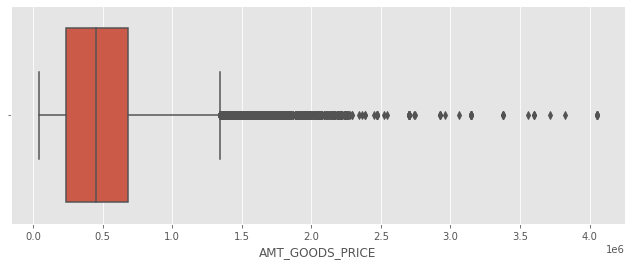

In [20]:
print(round(apdata['AMT_GOODS_PRICE'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99]),2))
plt.style.use("ggplot")
plt.figure(figsize=[11,4])
sns.boxplot(apdata['AMT_GOODS_PRICE'])
plt.show()

### Observation :
- Looking at statistical summary we can see that :-
- 99 pencentile is far from max value which shows there is outliers in the column
- There are values above 2000000 they cannot be treated as valid goods price 
- we have to impute median value 4500000 in place of missing values
- not performing any imputation here since its given case study

## NAME_TYPE_SUITE Imputation 
### Observation:-
- Missing Values percentage is 0.420148

In [21]:
# Checking for maximum repeated values in NAME_TYPE_SUITE
print(apdata["NAME_TYPE_SUITE"].value_counts())

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [22]:
print(apdata["NAME_TYPE_SUITE"].mode()[0])

Unaccompanied


### Observations:
- Value counts states that majority of NAME_TYPE_SUITE is under 'Uncompanied' Value.
- We can impute the mode value 'Uncompanied' in place of missing values

### OCCUPATION_TYPE Imputation
- Observation :- Occupation type is categorical Variable 

- Checking for maximum repeated values in OCCUPATION_TYPE}

In [23]:
print(apdata["OCCUPATION_TYPE"].value_counts())

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64


In [24]:
print(apdata["OCCUPATION_TYPE"].mode()[0])

Laborers


### Observation :-
- Majority of people applied for loan are working as laborers.
- Here is best to create seperate column for null values in occupation_type column
- imputing mode in null values will give unbalance analysis hence considering to impute. 

In [26]:
# Filling NAN va;ues with others
apdata["OCCUPATION_TYPE"].fillna(value="Others",inplace=True)

<AxesSubplot:xlabel='count', ylabel='OCCUPATION_TYPE'>

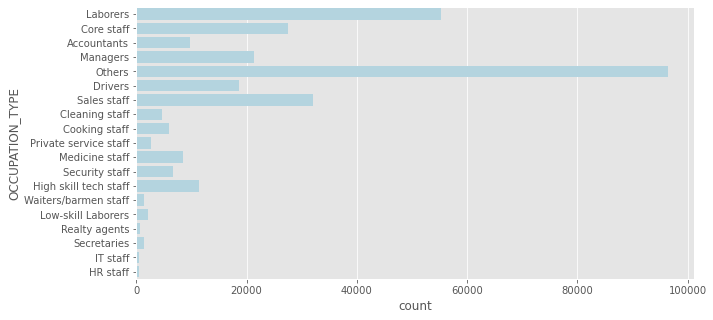

In [27]:
# Plotting the count plot to see the distribution column
plt.figure(figsize=[10,5])
sns.countplot(data=apdata,y="OCCUPATION_TYPE",color="lightblue")

## EXT_SOURCE_2 Imputation 
### Observation:
- EXT_SOURCE_2 is a numerical variable 
- Missing percentage value is 0.2146
- Need to use .describe boxplot for outliers }

count    306851.0000
mean          0.5144
std           0.1911
min           0.0000
10%           0.2157
25%           0.3925
50%           0.5660
75%           0.6636
99%           0.7828
max           0.8550
Name: EXT_SOURCE_2, dtype: float64


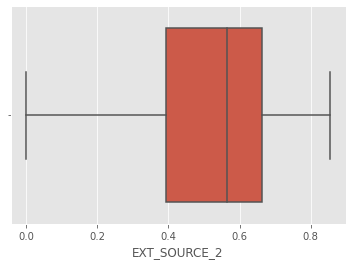

In [28]:
print(round(apdata['EXT_SOURCE_2'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99]),4))
sns.boxplot(apdata["EXT_SOURCE_2"])
plt.show()

### Observation:- 
- There is no outliers in the EXT_SOURCE_2
- Impute missing values using mean 
- will not impute as given in the case study 


## Imputation in AMT_CREDIT

### Observation:-
- AMT_CREDIT column is having numerical variable 
- So we can perform Boxplot for outliers 

count     307511.00
mean      599026.00
std       402490.78
min        45000.00
10%       180000.00
25%       270000.00
50%       513531.00
75%       808650.00
99%      1854000.00
max      4050000.00
Name: AMT_CREDIT, dtype: float64


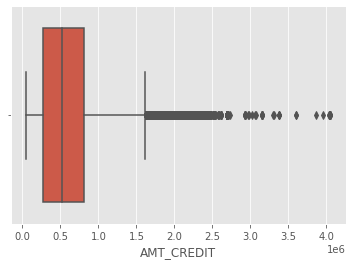

In [29]:
print(round(apdata['AMT_CREDIT'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99]),2)) # here is 2 because ,we have to set number decimal places needed.
sns.boxplot(apdata["AMT_CREDIT"])
plt.show()

### Observation:- Looking at stats summary we can see there are outliers 
- People with higher credit score or salary  can have higher loan amount getting approved 
- We can consider amount above 1854000.00 as outlier

## EXT_SOURCE_3 Imputation
### Observation:
- EXT_SOURCE_3 is a numerical variable
- Missing percentage value is 19.825307
- Need to use .describe boxplot for outliers }

count    246546.0000
mean          0.5109
std           0.1948
min           0.0005
10%           0.2276
25%           0.3706
50%           0.5353
75%           0.6691
99%           0.8328
max           0.8960
Name: EXT_SOURCE_3, dtype: float64


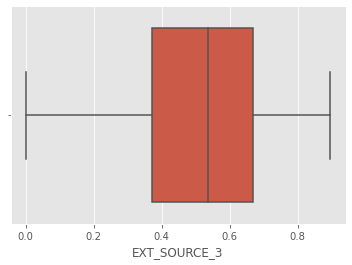

In [30]:
print(round(apdata['EXT_SOURCE_3'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99]),4))
sns.boxplot(apdata["EXT_SOURCE_3"])
plt.show()

### Observation:- 
- we can see there is no outliers here in EXT_SOURCE_3
- The number of null values are high 
- We can drop EXT_SOURCE_3 since its having high number of null values 
- We can use EXT_SOURCE_2 for our reference

## Number of enquiries to credit bureau Imputation 
### Observation :- Columns with number of enquaries to credit bureau columns are :

1. AMT_REQ_CREDIT_BUREAU_YEAR,
2. AMT_REQ_CREDIT_BUREAU_QTR,
3. AMT_REQ_CREDIT_BUREAU_MON,
4. AMT_REQ_CREDIT_BUREAU_WEEK,
5. AMT_REQ_CREDIT_BUREAU_DAY,
6. AMT_REQ_CREDIT_BUREAU_HOUR

- These are numerical variables  
- Missing percentage value is 13.50%
- We can use .describe boxplot to check for outliers

In [98]:
# Summary stats
apdata[['AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR']].describe()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
count               265992.000000              265992.000000   
mean                     1.899974                   0.265474   
std                      1.869295                   0.794056   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      1.000000                   0.000000   
75%                      3.000000                   0.000000   
max                     25.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.034362   
std                     0.916002                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
count              265992.000000               265992.000000  
mean                    0.007000                    0.006402  
std                     0.110757                    0.083849  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    0.000000  
75%                     0.000000                    0.000000  
max                     9.000000                    4.000000

In [100]:
# Checking recurring values 
apdata[['AMT_REQ_CREDIT_BUREAU_YEAR',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_HOUR']].mode()

AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                        0.0                         0.0

### Observation :
- AMT_REQ_CREDIT_BUREAU_YEAR
- Mean: 1899974
- Median: 1.000
- Mode: 0.0
- AMT_REQ_CREDIT_BUREAU_QRT
- Mean : 0.2654
- Median: 0
- Mode: 0.0
- AMT_REQ_CREDIT_BUREAU_MON
- Mean:0.2673
- Median 0
- Mode 0.0
- AMT_REQ_CREDIT_BUREAU_WEEK
- Mean:0.03436
- Median 0
- Mode 0.0
- AMT_REQ_CREDIT_BUREAU_DAY
- Mean:0.007
- Median 0
- Mode 0.0
- AMT_REQ_CREDIT_BUREAU_HOUR
- Mean:0.0064
- Median 0
- Mode 0.0

### OBS_30_CNT_SOCIAL_CIRCLE - Imputation
#### Observation:
- Missing value percentage is 0.33%
- We can use describe boxplot for see the outliers 

count    306490.0000
mean          1.4222
std           2.4010
min           0.0000
10%           0.0000
25%           0.0000
50%           0.0000
75%           2.0000
99%          10.0000
max         348.0000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


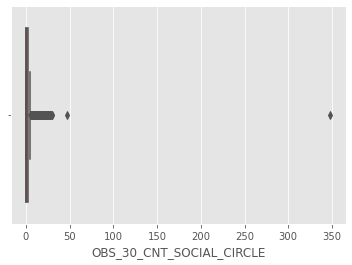

In [33]:
print(round(apdata['OBS_30_CNT_SOCIAL_CIRCLE'].describe(percentiles=[0.1,0.25,0.50,0.75,0.99]),4))
sns.boxplot(apdata["OBS_30_CNT_SOCIAL_CIRCLE"])
plt.show()

### Observation:- Statistical summary implies outliers having difference between 99% and max value
- There are 2 outliers 
- Mode 0.0 
- Mean 1.42
- Median 0.0
- We can add mean & median since mean ,median are close 

In [34]:
#Distribution of gender
apdata["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [35]:
# Checking counts of XNA
apdata[apdata["CODE_GENDER"]=="XNA"]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657               Others              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640              Others              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

### Observation:-
- Count of XNA very low ,will cause any unbalanced 
- replacing with F as Female has huge number in dataset

In [36]:
# Replacing 
apdata["CODE_GENDER"] = apdata["CODE_GENDER"].apply(lambda x:'F' if x=='XNA' else x)
apdata["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

### Inspecting DAYS_BIRTH 
#### Observation:-
- DAYS_BIRTH :-clients age in days at the time of application 

In [37]:
# checking statistical summary 
apdata["DAYS_BIRTH"].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

### Observation:-
- Date of birth cant be in negitive 
- Have to convert days into years for data to make sense


In [38]:
# Converting days birth into positive 
apdata["DAYS_BIRTH"]= apdata["DAYS_BIRTH"].apply(lambda x : abs(x) if x<0 else x)
apdata["DAYS_BIRTH"].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


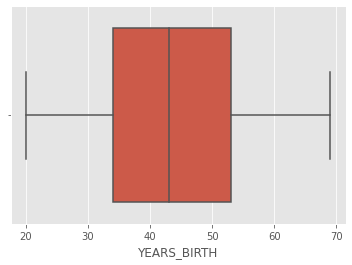

In [39]:
# creating new column year birth for ease in analysis
apdata["YEARS_BIRTH"] = apdata["DAYS_BIRTH"].apply(lambda x:(x//365))
print(apdata["YEARS_BIRTH"].describe())
sns.boxplot(data=apdata,x="YEARS_BIRTH")
plt.show()

### Observation:-
- Min age of aplicant is 20
- MAx age of applicant is 69
- Mean & Median is very close to each other  ie 43
- There are no outliers here 
- Most of the age group applicant are in age of of 34-54

### Inspecting NAME_FAMILY_STATUS column
#### Observation here:-
- Its a categorical Column
- NAME_FAMILY_STATUS -: Family status of the client 

In [40]:
# Distributiuon
apdata["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

### Observation :- 
- Unknown value indicates there is soem discrepency by data provider or applicant was'nt specified the details

In [41]:
apdata[apdata["NAME_FAMILY_STATUS"]=='Unknown']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
41982       33750.0              NaN             NaN  Commercial associate   
187348      29250.0              NaN             NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
41982                     0.015221       12396          -1161   
187348                    0.031329       12844           -232   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
41982             -3265.0            -4489           1               1   
187348            -1597.0            -1571           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
41982                 1                 1           1           0   
187348                0                 1           0           0   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
41982         Managers              NaN                     2   
187348     Accountants              NaN                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
41982                             2                   THURSDAY   
187348                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
41982                        15                           0   
187348                       14                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
41982                            1                            1   
187348                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
41982                        0                       1   
187348                       0                       0   

        LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  \
41982                         1               Insurance      0.700618   
187348                        0  Business Entity Type 2      0.645168   

        EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
41982            NaN                          NaN            NaN   
187348      0.670652                        0.997          0.375   

        YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
41982                            NaN             NaN   
187348                         0.997           0.375   

        YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  \
41982                            NaN             NaN             NaN   
187348                         0.997           0.375          0.0791   

       EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  \
41982                  NaN                       3.0   
187348                  No                       1.0   

        DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
41982                        0.0                       3.0   
187348                       0.0                       1.0   

        DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  \
41982                        0.0                  -876.0                0   
187348                       0.0                  -654.0                0   

        FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
41982                 0                0                1     

#### We can replace it with 'Mode' 

In [42]:
# Replacing unknown with married 
apdata["NAME_FAMILY_STATUS"] = apdata["NAME_FAMILY_STATUS"].apply(lambda x: 'Married' if x=='Unknown' else x)
apdata["NAME_FAMILY_STATUS"].value_counts()

Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

### Observation :-
- Married people are the people who are applying for loan the most followed by single and married
- Widows  are  the ones having less number of loan application 

### Inspecting DAYS_EMPLOYED column
#### Observation :-
-  DAYS_EMPLOYS Column :- How many days before the application  the person started current employmemt

In [43]:
# stats 
apdata["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### Observation :-
- Days employed cant be negitive
- Also have to convert days to years  to make sense

In [44]:
# converting it to positive and checking stats 
apdata["DAYS_EMPLOYED"] = apdata["DAYS_EMPLOYED"].apply(lambda x:abs(x) if x<0 else x)
apdata["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [45]:
print(apdata["DAYS_EMPLOYED"].value_counts().head())
print()
print(apdata["DAYS_EMPLOYED"].value_counts(normalize=True).head())

365243    55374
200         156
224         152
230         151
199         151
Name: DAYS_EMPLOYED, dtype: int64

365243    0.180072
200       0.000507
224       0.000494
230       0.000491
199       0.000491
Name: DAYS_EMPLOYED, dtype: float64


### Observation:-
- Min employement daysof applicant is 0
- Max employment days is 365243 if we divide by 365 days will comes 1000 years so its impossible 
- 55374 records have  days as unrealistic value 
- this value is present in  for 18 % of  the data  and cannot be anomly
- there are outliers 

In [46]:
# checking type income for these anomly values for more clarity 
apdata[apdata["DAYS_EMPLOYED"]==365243].NAME_INCOME_TYPE.value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

Creating Column of year employed for more sense

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEAR_EMPLOYED, dtype: float64


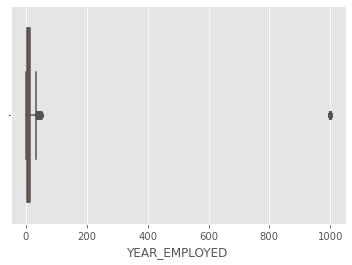

In [47]:
apdata["YEAR_EMPLOYED"]= apdata["DAYS_EMPLOYED"].apply(lambda x: (x//365))
print(apdata["YEAR_EMPLOYED"].describe())
sns.boxplot(data=apdata,x='YEAR_EMPLOYED')
plt.show()

### Observation:- Here we can see massive outlier 
- Min employment years of application  is 0
- MAx employment years is 1000 which is impossible 
- There are outliers but as discussed above they are pensioners or Unmemployed
 


### Inspecting DAYS_REGISTRATION Column
- Days Registration column indicates how many days before the application did client change his Registration 

In [48]:
#stats summary
print(apdata["DAYS_REGISTRATION"].describe())
print()
print(apdata["DAYS_REGISTRATION"].value_counts())
print()
print(apdata["DAYS_REGISTRATION"].value_counts(normalize=True))

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

-1.0        113
-7.0         98
-6.0         96
-4.0         92
-2.0         92
           ... 
-15581.0      1
-15031.0      1
-14804.0      1
-15008.0      1
-14798.0      1
Name: DAYS_REGISTRATION, Length: 15688, dtype: int64

-1.0        0.000367
-7.0        0.000319
-6.0        0.000312
-4.0        0.000299
-2.0        0.000299
              ...   
-15581.0    0.000003
-15031.0    0.000003
-14804.0    0.000003
-15008.0    0.000003
-14798.0    0.000003
Name: DAYS_REGISTRATION, Length: 15688, dtype: float64


### Observation:-
- Days registration cant be negitive
- also have to convert days to years

In [50]:
# Converting days registration to positive
apdata["DAYS_REGISTRATION"] = apdata["DAYS_REGISTRATION"].apply(lambda x: abs(x) if x<0 else x)
apdata["DAYS_REGISTRATION"].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


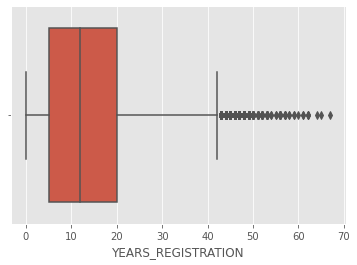

In [51]:
apdata["YEARS_REGISTRATION"]= apdata["DAYS_REGISTRATION"].apply(lambda x:(x//365))
print(apdata["YEARS_REGISTRATION"].describe())
sns.boxplot(data=apdata,x='YEARS_REGISTRATION')
plt.show()

### Checking Imbalance for TARGET Column

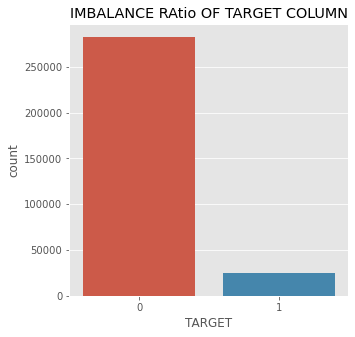

In [53]:
# Checking imbalance using countplot
plt.style.use('ggplot')
plt.figure(figsize=[5,5])

sns.countplot(data=apdata,x='TARGET')
plt.title ("IMBALANCE RAtio OF TARGET COLUMN")
plt.show()

### 0 :- indicates On time payment clients 
### 1 :- indicates Clients with payment difficulties

In [54]:
# checking ratio of Both type of Clients 
apdata[apdata["TARGET"]==0].shape[0]/apdata[apdata["TARGET"]==1].shape[0]

11.387150050352467

### Checking imbalance in percentage

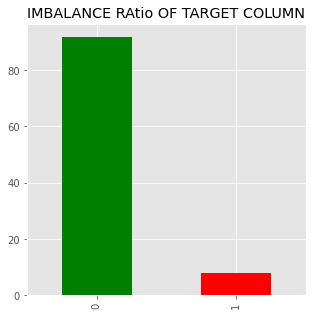

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=[5,5])

(apdata["TARGET"].value_counts(normalize=True)*100).plot.bar(color=['Green','Red'])
plt.title ("IMBALANCE RAtio OF TARGET COLUMN")
plt.show()

### Observation:-
- 1 in every 11 applicant has payment difficulty

#### Observation:-
- Target column has 2 attributes  
- 1:- indicates payment difficulties
- 0:- all other cases


### Inspecting TARGET Column

In [56]:
print(apdata["TARGET"].value_counts())
print()
print(apdata["TARGET"].value_counts(normalize=True))

0    282686
1     24825
Name: TARGET, dtype: int64

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


In [57]:
df0 = apdata[apdata["TARGET"]==0]
df1 = apdata[apdata["TARGET"]==1]

### Analysis of numeric column 

In [58]:
# checking out total numbe of numeric columns
apdata.columns[(apdata.dtypes=="int64")|(apdata.dtypes=="float64")]

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
      

Observation:- Many columns with int datatype are flag columns so will remove unwanted columns 

In [59]:
# deleting flag columns
for i in apdata.columns:
    if i.startswith("FLAG"):
        apdata.drop(columns=i,inplace=True)

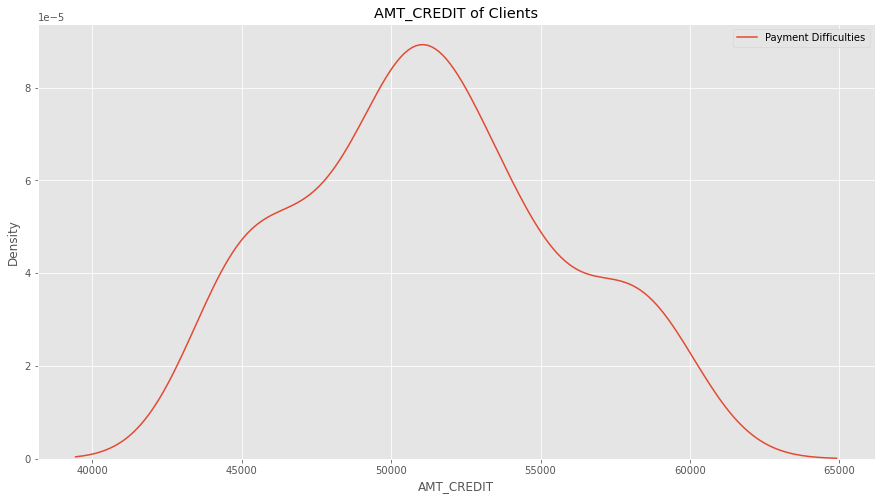

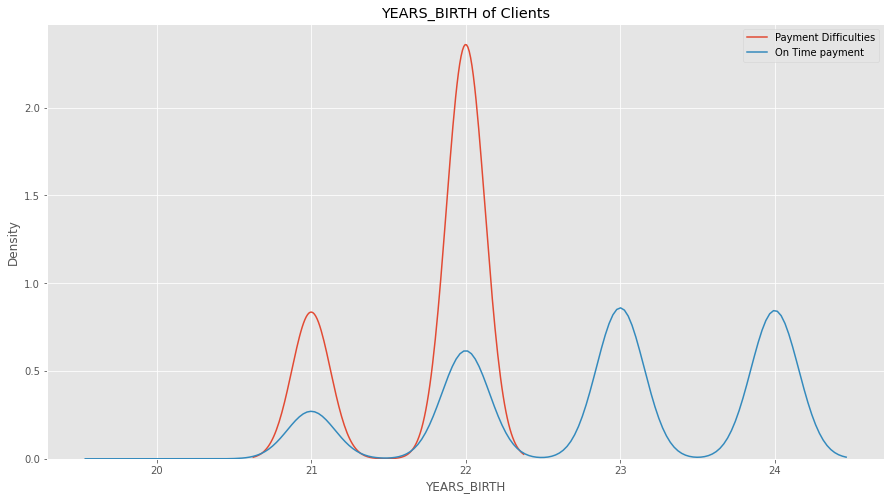

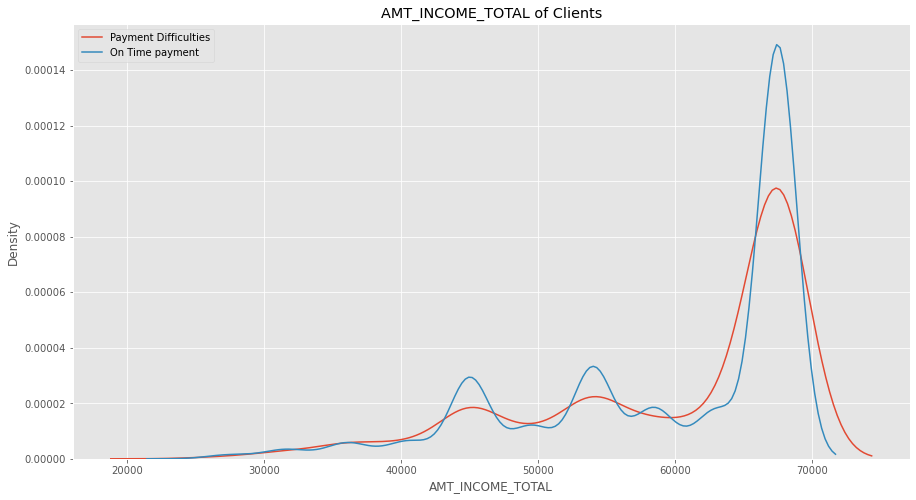

No handles with labels found to put in legend.


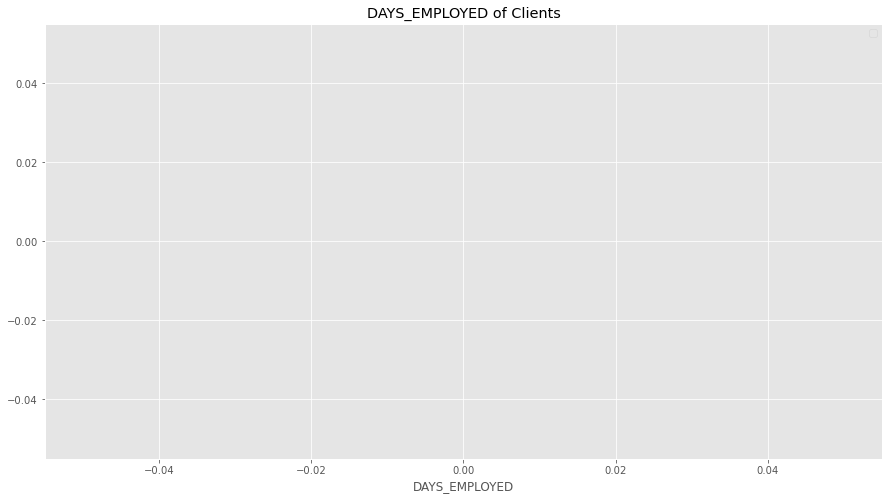

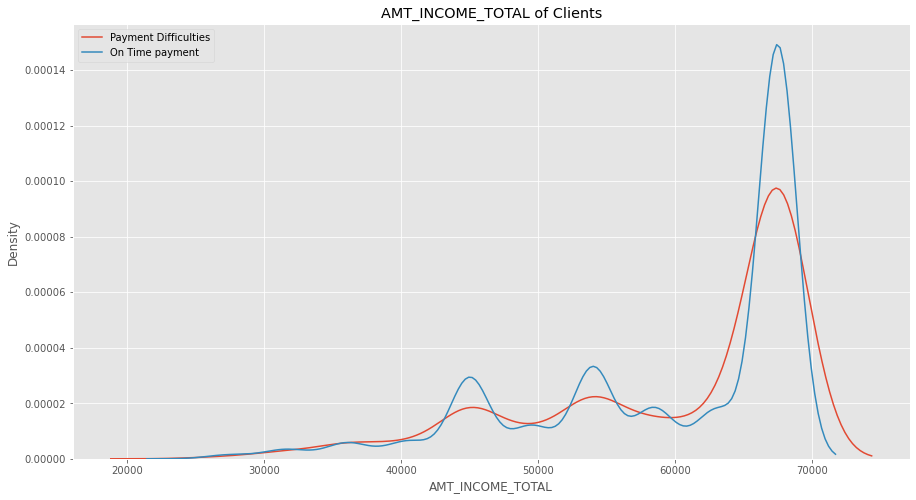

In [63]:
# plotting dist plot without any outliers 
di_plot=["AMT_CREDIT","YEARS_BIRTH","AMT_INCOME_TOTAL","DAYS_EMPLOYED","AMT_INCOME_TOTAL"]
for i in di_plot:
    #calculating IQR for the clients having payment difficulties
    df1_Q1 = df1[i].quantile(0.25)
    df1_Q3 = df1[i].quantile(0.75)
    df1_IQR = df1_Q3 - df1_Q1
    Min_value1 = (df1_Q1 - 1.5 * df1_IQR )
    Max_value1 = (df1_Q3 - 1.5 * df1_IQR )
    #calculating IQR for the clients having on time payment
    df0_Q1 = df0[i].quantile(0.25)
    df0_Q3 = df0[i].quantile(0.75)
    df0_IQR = df0_Q3 - df0_Q1
    Min_value0 = (df0_Q1 - 1.5 * df0_IQR )
    Max_value0 = (df0_Q3 - 1.5 * df0_IQR )
    # Removing outliers and plotting distplot
    plt.figure(figsize=[15,8])
    sns.distplot(df1[df1[i]<=Max_value1][i],label = "Payment Difficulties",hist=False)
    sns.distplot(df0[df0[i]<=Max_value0][i],label = "On Time payment",hist=False)
    plt.title(f'{i} of Clients')
    plt.ticklabel_format(style="plain",axis="x")          
    plt.legend()
    plt.show()

### Observation here:-
- Amt credit between 250000 and approximately 650000,there are more clients with payment difficulties 
- For Amt credit . 750000, more clients have on time payments
- For mostly clients having payment difficulties, we can see incomes is between 60000-70000 which is odd 

### Correlation of EXT_source_x columns vs target column

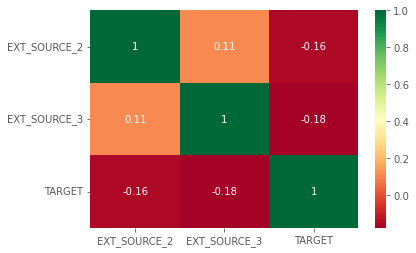

In [64]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
# There is Low coorelation between EXT_SOURCE_X columns vs TARGET column

EXT_SOURCE_X = apdata[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
EXT_SOURCE_X_corr = EXT_SOURCE_X.corr()
ax = sns.heatmap(EXT_SOURCE_X_corr,
            xticklabels=EXT_SOURCE_X_corr.columns,
            yticklabels=EXT_SOURCE_X_corr.columns,
            annot = True,
            cmap ="RdYlGn")

### Observation :- 
- Based on heat map there is not correlation

Checking correlation of AMT_REQ_CREDIT_XXXXX columns vs TARGET column

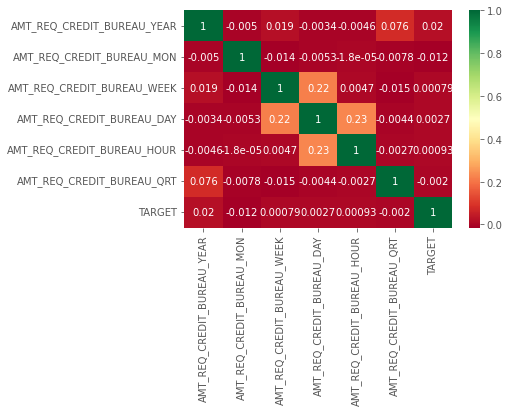

In [67]:
AMT_REQ_CREDIT = apdata[[
    "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON",
    "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR",
    "AMT_REQ_CREDIT_BUREAU_QRT", "TARGET"
]]
AMT_REQ_CREDIT_corr = AMT_REQ_CREDIT.corr()
ax = sns.heatmap(AMT_REQ_CREDIT_corr,
                 xticklabels=AMT_REQ_CREDIT_corr.columns,
                 yticklabels=AMT_REQ_CREDIT_corr.columns,
                 annot=True,
                 cmap="RdYlGn")

### Observation: Based on the above Heatmap There is almost no coorelation between AMT_REQ_CREDIT_XXXXX columns vs TARGET column                                                                                  

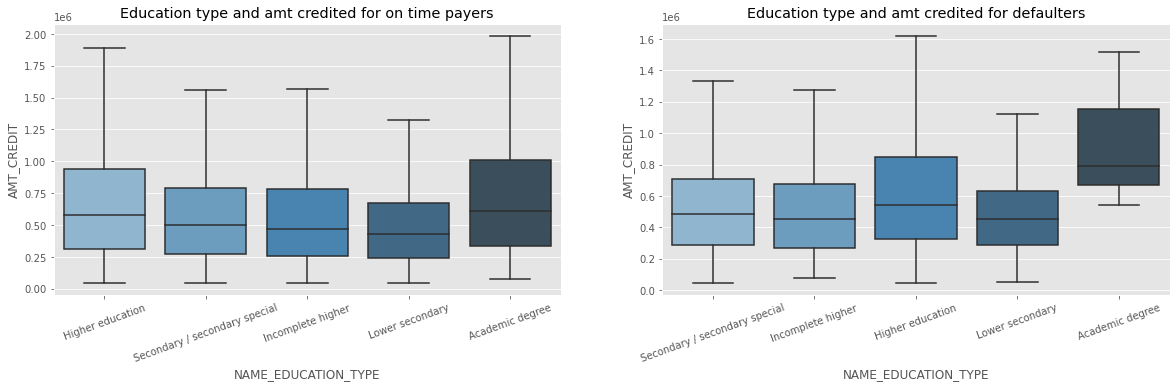

In [73]:
# plot for education type and amt credited
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.title("Education type and amt credited for on time payers")
sns.boxplot(x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",data=df0,showfliers=False ,palette='Blues_d')
plt.xticks(rotation=20,fontsize=10,fontweight=2)
plt.subplot(1,2,2)
plt.title("Education type and amt credited for defaulters")
sns.boxplot(x= "NAME_EDUCATION_TYPE",y = "AMT_CREDIT",data=df1,showfliers=False ,palette='Blues_d')
plt.xticks(rotation=20,fontsize=10,fontweight=2)
plt.show()

### Observation:-
- Meadian for loan values defaulting for applicants with acadecmic is higher
- But as we saw a plot above , number of applicants with with academic degree is very small
- No inference can be drwan from this analysis 


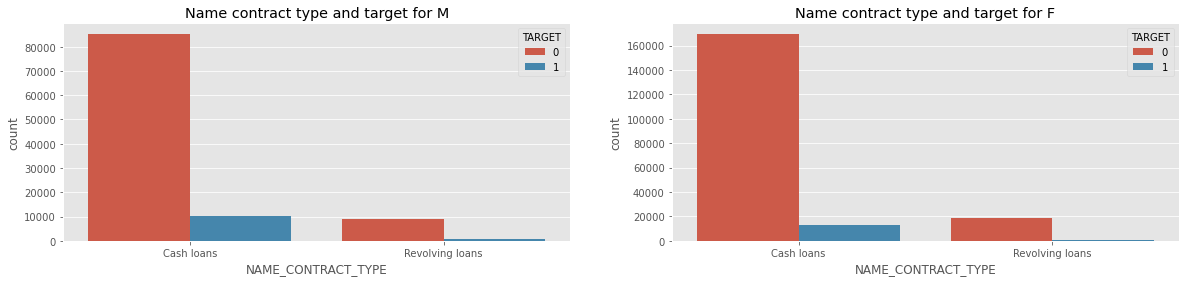

In [74]:
# Plot to check male vs female default rate 
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title("Name contract type and target for M")
sns.countplot('NAME_CONTRACT_TYPE',hue='TARGET',data=apdata[apdata["CODE_GENDER"]=="M"])
plt.subplot(1,2,2)
plt.title("Name contract type and target for F")
sns.countplot('NAME_CONTRACT_TYPE',hue='TARGET',data=apdata[apdata["CODE_GENDER"]=="F"])
plt.show()

### Observation :- 
- Male applicant defaulting more than female applicants

# Conclusion: Cleint categories to be targeted for providing loans 

- Clients who are employed for more than 19 years 
- Female clients who are working 
- Male clients with academic degree
- Clients who are married 
- students and business man
- Repeater Clients

### Previous application ANAlysis

In [75]:
previous_data = pd.read_csv("previous_application.csv")
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

observation :- header is fine

In [76]:
previous_data.tail()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1048570     2230795      255000     Consumer loans    50978.475   
1048571     1823303      158245         Cash loans          NaN   
1048572     1730537      429268     Consumer loans     5793.120   
1048573     2100360      389043     Consumer loans     4775.355   
1048574     1283481      250078     Consumer loans     6617.925   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1048570         210960.0    189864.0           21096.0         210960.0   
1048571              0.0         0.0               NaN              NaN   
1048572          38070.0     36526.5            3807.0          38070.0   
1048573          35356.5     30109.5            7110.0          35356.5   
1048574          44986.5     23229.0           22500.0          44986.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1048570                     SUNDAY                       15   
1048571                    TUESDAY                       18   
1048572                     SUNDAY                       12   
1048573                   SATURDAY                       18   
1048574                    TUESDAY                       11   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1048570                           Y                       1   
1048571                           Y                       1   
1048572                           Y                       1   
1048573                           Y                       1   
1048574                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1048570           0.108909                    NaN                       NaN   
1048571                NaN                    NaN                       NaN   
1048572           0.102797                    NaN                       NaN   
1048573           0.208048                    NaN                       NaN   
1048574           0.535864                    NaN                       NaN   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
1048570                    XAP              Refused           -261   
1048571                    XNA              Refused           -344   
1048572                    XAP             Approved          -2335   
1048573                    XAP             Approved          -2883   
1048574                    XAP             Approved          -2544   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
1048570  Cash through the bank              LIMIT    Unaccompanied   
1048571                    XNA              SCOFR              NaN   
1048572  Cash through the bank                XAP           Family   
1048573  Cash through the bank                XAP  Spouse, partner   
1048574  Cash through the bank                XAP          Other_B   

        NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
1048570         Repeater             Jewelry            POS               XNA   
1048571         Repeater                 XNA            XNA               XNA   
1048572              New              Mobile            POS               XNA   
1048573         Repeater              Mobile            POS               XNA   
1048574              New              Mobile            POS               XNA   

                    CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
1048570                    Stone                25             Industry   
1048571  Credit and cash offices                -1                  XNA   
1048572             Country-wide                24         Connectivity   
1048573             Country-wide                44         Connectivity   
1048574             Country-wide                44         Connectivity   

         CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  \
1048570          4.0           middle   POS other with interest   
1048571 

observation :- bottom also fine

In [77]:
previous_data.shape

(1048575, 37)

observation dataframe has 1048575 rows and 37 columns

### Dealing with incorrect data type 

In [78]:
previous_data.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

observation :- datatypes looks fine but sets contain null values 

In [79]:
# checking stats
previous_data.describe()

SK_ID_PREV    SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  1.048575e+06  1.048575e+06  815566.000000     1.048575e+06   
mean   1.922775e+06  2.784367e+05   15891.265151     1.742698e+05   
std    5.329366e+05  1.028569e+05   14745.557438     2.910789e+05   
min    1.000001e+06  1.000010e+05       0.000000     0.000000e+00   
25%    1.460642e+06  1.893860e+05    6301.350000     1.890000e+04   
50%    1.923419e+06  2.788100e+05   11250.000000     7.081650e+04   
75%    2.384448e+06  3.677445e+05   20523.003750     1.800000e+05   
max    2.845382e+06  4.562550e+05  418058.145000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.048575e+06      4.891790e+05     8.076100e+05   
mean   1.950000e+05      6.700778e+03     2.262892e+05   
std    3.169407e+05      2.078570e+04     3.134490e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.427750e+04      0.000000e+00     5.058000e+04   
50%    8.025300e+04      1.624500e+03     1.115116e+05   
75%    2.152395e+05      7.749000e+03     2.295000e+05   
max    6.905160e+06      2.150100e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.048575e+06            1.048575e+06      489179.000000   
mean              1.248486e+01            9.964123e-01           0.079619   
std               3.333140e+00            5.979011e-02           0.107882   
min               0.000000e+00            0.000000e+00          -0.000014   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051062   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           0.989740   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            3721.000000               3721.000000   1.048575e+06   
mean                0.187177                  0.774922  -8.820381e+02   
std                 0.083343                  0.099514   7.792649e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.303000e+03   
50%                 0.189122                  0.835095  -5.830000e+02   
75%                 0.193330                  0.852537  -2.810000e+02   
max                 1.000000                  1.000000  -2.000000e+00   

       SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.048575e+06  815569.000000       627867.000000   627867.000000   
mean       3.183904e+02      15.995639       342387.346201    13833.802031   
std        7.996734e+03      14.508109        88595.441587    72460.126454   
min       -1.000000e+00       0.000000        -2921.000000    -2892.000000   
25%       -1.000000e+00       6.000000       365243.000000    -1626.000000   
50%        4.000000e+00      12.000000       365243.000000     -830.000000   
75%        8.500000e+01      24.000000       365243.000000     -410.000000   
max        4.000000e+06      84.000000       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              627867.000000  627867.000000     627867.000000   
mean                33614.930898   76591.061435      81985.701661   
std                106643.960780  149653.053854     153298.887247   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1241.000000   -1313.000000      -1269.000000   
50%                  -361.000000    -537.000000       -498.000000   
75%                   128.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              627867.000000  
mean                    0.331530  
std                     0.470764  
min                     0.000000  
25%         

### Observation :- there many column having negitive values need to manage that

### Percentage of null values 

In [104]:
previous_data.isna().sum()/len(previous_data)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

#### Observation :- lots of null values
- Need to remove null values ,and taking threshhold as 30

In [81]:
previous_data = previous_data.loc[:,(previous_data.isnull().sum()/len(previous_data)*100)<30] 

In [82]:
# checking updated percentage
(previous_data.isna().sum()/len(previous_data)*100)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.221205
NAME_YIELD_GROUP

### Observations :-
- Null values have to be imputed for the columns 
- AMT_ANNUITY : imputing values with median as there are outliers in AMT_ANNUITY
- AMT_GOODS_PRICE : imputing missing values with median as there are outliers in AMT_GOODS_PRICE
- CNT_PAYMENT :imputing missing values with median as there are outliers in CNT_PAYMENT
- PRODUCT_COMBINATION: imputing missing values with mode as it is a categorical data


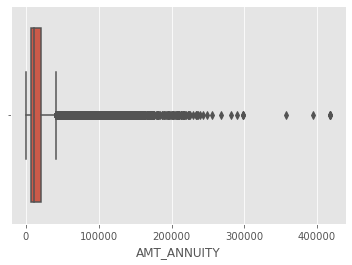

In [83]:
sns.boxplot(previous_data.AMT_ANNUITY)
previous_data.AMT_ANNUITY.fillna(previous_data.AMT_ANNUITY.median(),inplace=True)

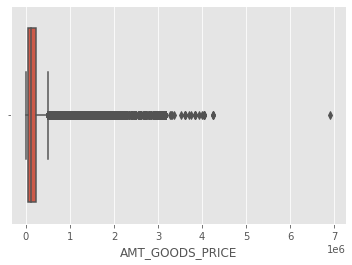

In [84]:
sns.boxplot(previous_data.AMT_GOODS_PRICE)
previous_data.AMT_GOODS_PRICE.fillna(previous_data.AMT_GOODS_PRICE.median(),inplace=True)

12.0    436132
6.0     120215
0.0      90935
10.0     89513
24.0     86660
Name: CNT_PAYMENT, dtype: int64


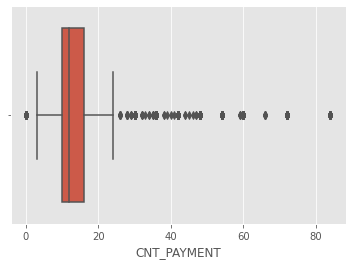

In [86]:
sns.boxplot(previous_data.CNT_PAYMENT)
print(previous_data.CNT_PAYMENT.value_counts().head())
previous_data.CNT_PAYMENT.fillna(previous_data.CNT_PAYMENT.median(),inplace=True)

In [87]:
previous_data.PRODUCT_COMBINATION.value_counts()

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
Name: PRODUCT_COMBINATION, dtype: int64

In [88]:
previous_data.PRODUCT_COMBINATION.fillna(previous_data.PRODUCT_COMBINATION.mode()[0],inplace=True)

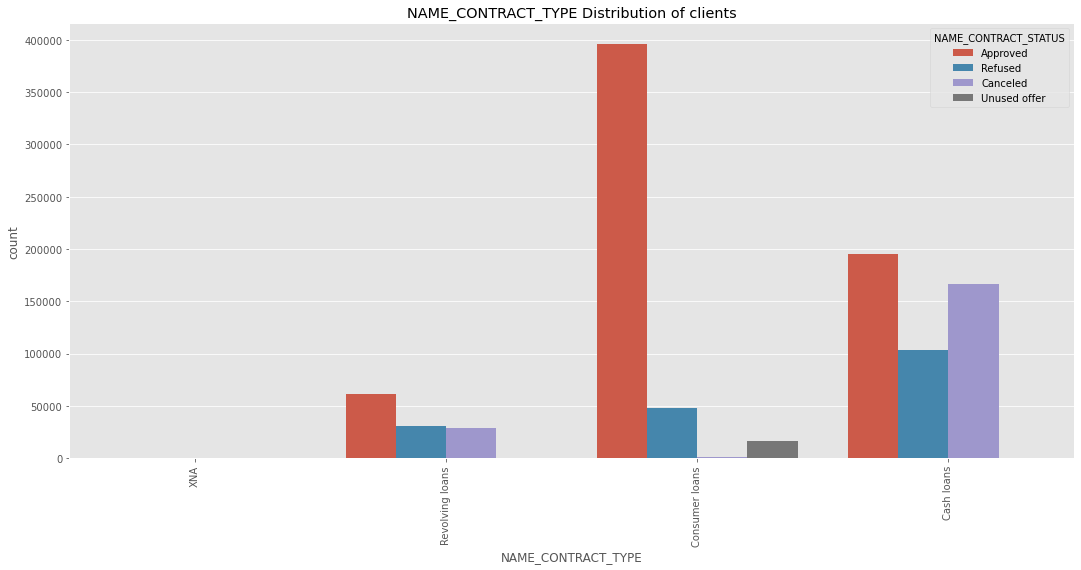

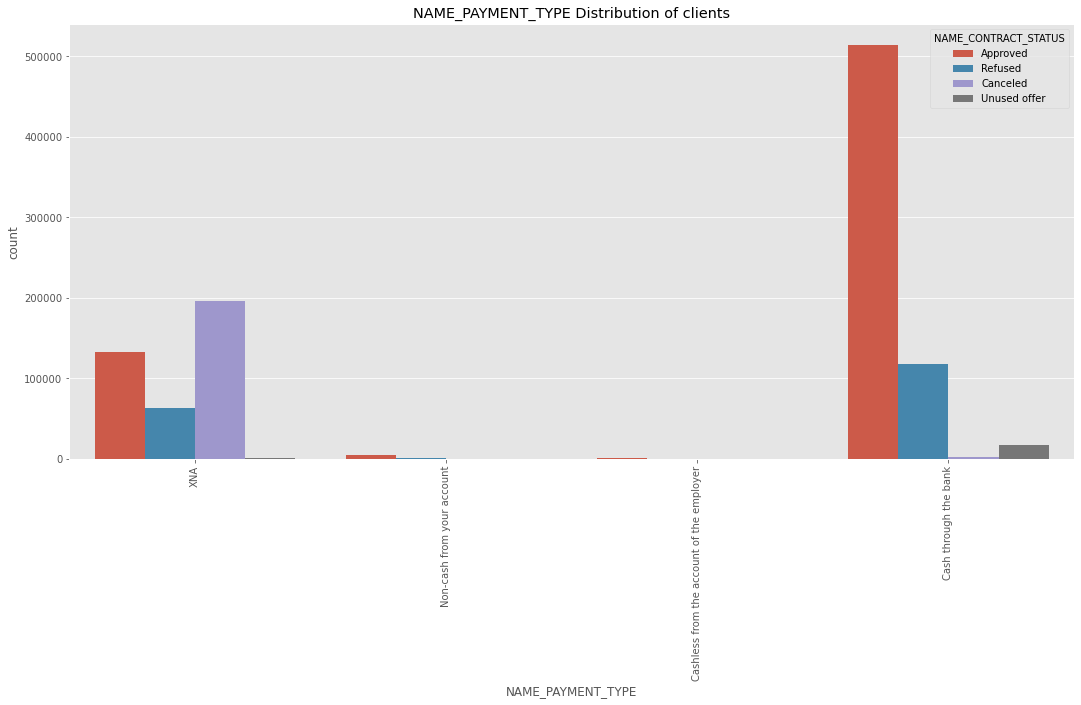

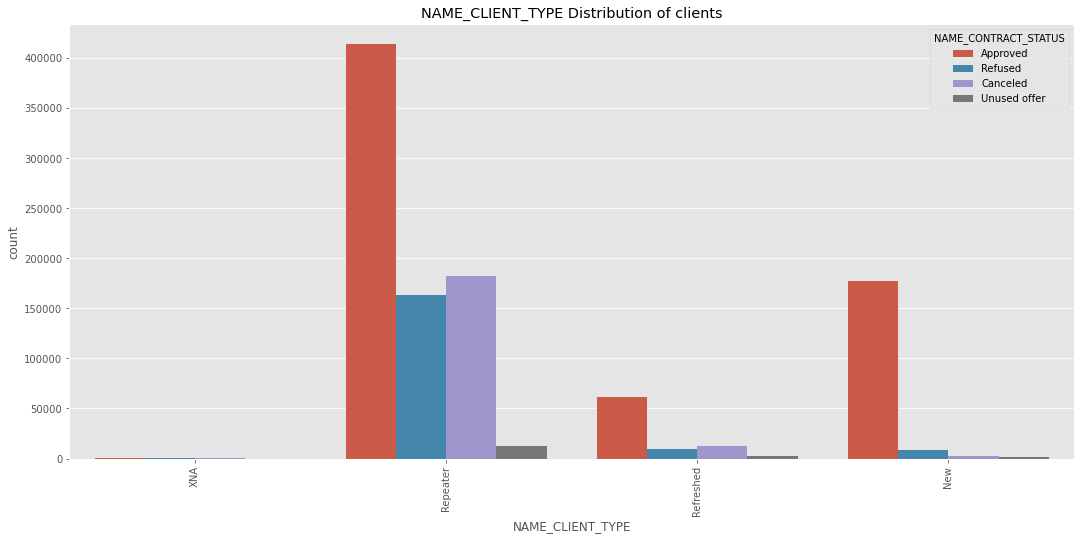

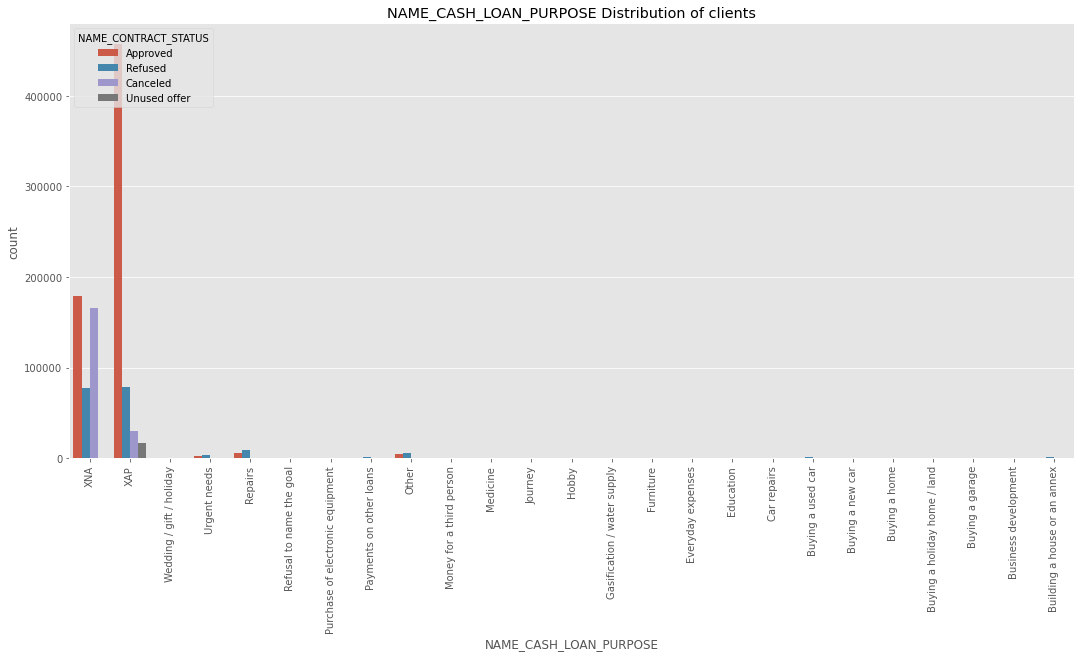

In [90]:
# plotting count plot on target object
c_plot = ["NAME_CONTRACT_TYPE","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE",'NAME_CASH_LOAN_PURPOSE']
for i in c_plot:
    plt.style.use("ggplot")
    plt.figure(figsize=[18,8])
    plt.title(f'{i} Distribution of clients')
    sns.countplot(data=previous_data, x=i,hue="NAME_CONTRACT_STATUS",order = sorted(previous_data[i].unique(),reverse=True))
    plt.xticks(rotation=90)

## Observation:-
- in approved category customer has largest number of application
- there seem to be no canceled loans in cash loan category than consumer loan 
- More cash loan has refused than consumer loans .


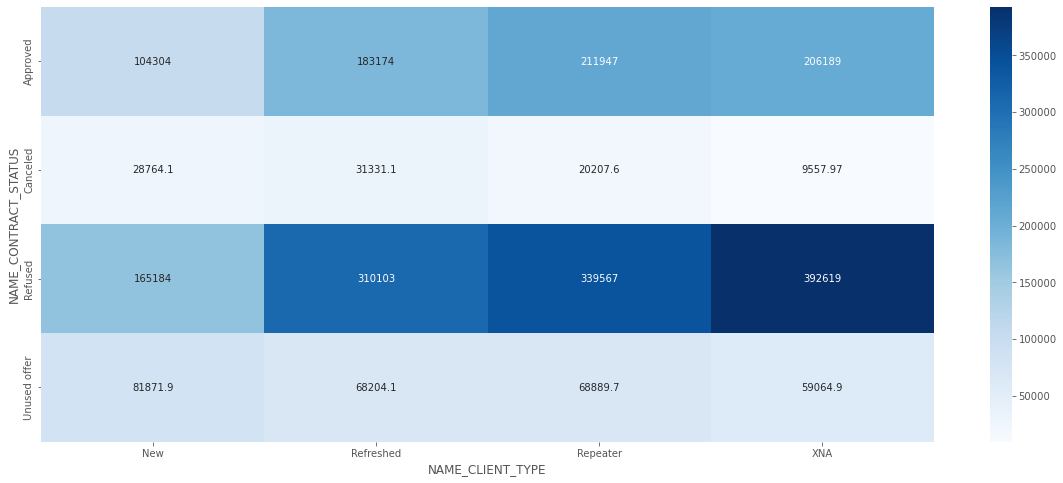

In [93]:
# checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=previous_data,index="NAME_CONTRACT_STATUS",columns="NAME_CLIENT_TYPE",values="AMT_APPLICATION")
plt.figure(figsize=[20,8])
sns.heatmap(res,annot=True,cmap='Blues',fmt='g')
plt.show()

### Observation:-

- unused offer credit amount is low ,maybe the reason customer not using 
- canceled and refused cases  have higher value of goods than the other categories

# CASE STUDY SUMMARY

## Chances of customer having payment difficulties in new application refer below :_

- All the variables fetched in analysis  of aplication dataframe as leading to default. checked these against the approved loans which defaults and this proves to be correct 
- Chances of customer having payment difficulties in Medium income
- Chances of customer having payment difficulties in Male category
- Chances of customer having payment difficulties in Unemployed category
- Chances of customer having payment difficulties in Labourers,salesman,Drivers
- Own house =No
- Previous application with refused /Canceled/unused loans also have default which matter of concern 
- This indicates that financial company had Refused / canceled previous application but has approved the current and is facing default on this 
- Female applicants should be given extra weightage as defaults are lesser
- Students and business man has no problem in repayment of loan 
- Previous application with refused , canceled ,unused loans also have cases where payments are coming on time in current application ,this indicates that possibly wrong descisions were done in those cases.